# 1. Install PIP's

In [12]:
# Translator
!pip install googletrans==3.1.0a0

# geo files for Brazil
!pip install geobr
!pip install mapsmx
!pip install xgboost
!pip install sweetviz

   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB 667.8 kB/s eta 0:00:23
   ---------------------------------------- 0.0/15.1 MB 667.8 kB/s eta 0:00:23
   ---------------------------------------- 0.1/15.1 MB 365.7 kB/s eta 0:00:42
   ---------------------------------------- 0.1/15.1 MB 403.5 kB/s eta 0:00:38
   ---------------------------------------- 0.1/15.1 MB 532.5 kB/s eta 0:00:29
    --------------------------------------- 0.2/15.1 MB 726.5 kB/s eta 0:00:21
    --------------------------------------- 0.2/15.1 MB 656.8 kB/s eta 0:00:23
    --------------------------------------- 0.3/15.1 MB 682.7 kB/s eta 0:00:22
    --------------------------------------- 0.3/15.1 MB 682.7 kB/s eta 0:00:22
    --------------------------------------- 0.3/15.1 MB 700.2 kB/s eta 0:00:22
   - -------------------------------------- 0.4/15.1 MB 815.2 kB/s eta

# 2. Import Packages

In [42]:
import pandas as pd
import os
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# 3. Load Data

In [4]:
customers_df = pd.read_csv("olist_customers_dataset.csv")
geolocation_df = pd.read_csv("olist_geolocation_dataset.csv")
order_items_df = pd.read_csv("olist_order_items_dataset.csv")
order_payments_df = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv("olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("olist_orders_dataset.csv")
products_df = pd.read_csv("olist_products_dataset.csv")
sellers_df = pd.read_csv("olist_sellers_dataset.csv")
product_category_name_translation_df = pd.read_csv("product_category_name_translation.csv")

# 4. Data Wrangling

### 4.1. Merge Data and Drop Duplicates

In [5]:
full_df = orders_df.merge(order_reviews_df, on='order_id')\
                   .merge(order_payments_df, on='order_id')\
                   .merge(customers_df, on='customer_id')\
                   .merge(order_items_df, on='order_id')\
                   .merge(products_df, on='product_id')\
                   .merge(sellers_df, on='seller_id')

In [6]:
# Drop duplicates
full_df = full_df.drop_duplicates()

### 4.2. Previus Analyze

In [16]:
def df_metadata(df):
    metadata = pd.DataFrame(df.dtypes,columns=['dtypes'])
    metadata = metadata.reset_index()
    metadata['Column'] = metadata['index']
    metadata = metadata[['Column','dtypes']]
    metadata['# Missing'] = df.isnull().sum().values    
    metadata['# Unique'] = df.nunique().values
    metadata['Example'] = df.loc[0].values

    for name in metadata['Column'].value_counts().index:
        metadata.loc[metadata['Column'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return metadata
    
df_metadata(full_df)

,Column,dtypes,# Missing,# Unique,Example,Entropy
0,order_id,object,0,97916,e481f51cbdc54678b7cc49136f2d6af7,16.43
1,customer_id,object,0,97916,9ef432eb6251297304e76186b10a928d,16.43
2,order_status,object,0,7,delivered,0.19
3,order_purchase_timestamp,datetime64[ns],0,97370,2017-10-02 10:56:33,16.42
4,order_approved_at,datetime64[ns],15,89533,2017-10-02 11:07:15,16.26
5,order_delivered_carrier_date,datetime64[ns],1235,80449,2017-10-04 19:55:00,16.02
6,order_delivered_customer_date,datetime64[ns],2471,95021,2017-10-10 21:25:13,16.39
7,order_estimated_delivery_date,datetime64[ns],0,449,2017-10-18 00:00:00,8.47
8,review_id,object,0,97708,a54f0611adc9ed256b57ede6b6eb5114,16.43
9,review_score,int64,0,5,4,1.77


### 4.3. Data Types Conversion

In [26]:
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 
                    'order_delivered_carrier_date', 'order_delivered_customer_date', 
                    'order_estimated_delivery_date', 
                    'review_creation_date', 'review_answer_timestamp',
                    'shipping_limit_date']
full_df[datetime_columns] = full_df[datetime_columns].apply(pd.to_datetime)

In [30]:
full_df = full_df.rename(columns={'product_name_lenght': 'product_name_length',
                                   'product_description_lenght': 'product_description_length'
                                  })

In [31]:
df_metadata(full_df)

,Column,dtypes,# Missing,# Unique,Example,Entropy
0,order_id,object,0,97916,e481f51cbdc54678b7cc49136f2d6af7,16.43
1,customer_id,object,0,97916,9ef432eb6251297304e76186b10a928d,16.43
2,order_status,object,0,7,delivered,0.19
3,order_purchase_timestamp,datetime64[ns],0,97370,2017-10-02 10:56:33,16.42
4,order_approved_at,datetime64[ns],15,89533,2017-10-02 11:07:15,16.26
5,order_delivered_carrier_date,datetime64[ns],1235,80449,2017-10-04 19:55:00,16.02
6,order_delivered_customer_date,datetime64[ns],2471,95021,2017-10-10 21:25:13,16.39
7,order_estimated_delivery_date,datetime64[ns],0,449,2017-10-18 00:00:00,8.47
8,review_id,object,0,97708,a54f0611adc9ed256b57ede6b6eb5114,16.43
9,review_score,int64,0,5,4,1.77


# 5. Exploratory Data Analysis

### 5.1. Analyze Report with Analyze Package

                                             |          | [  0%]   00:00 -> (? left)


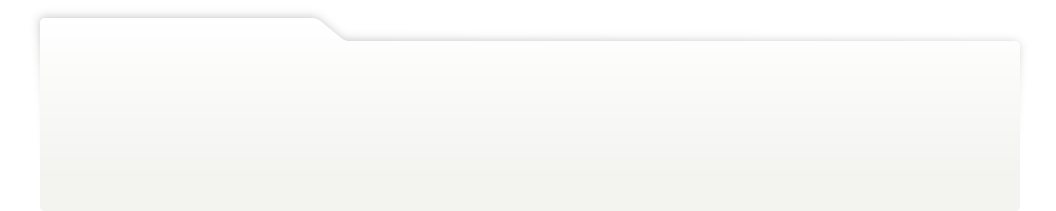
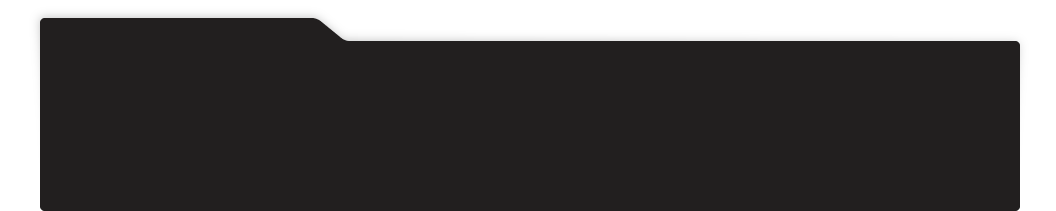
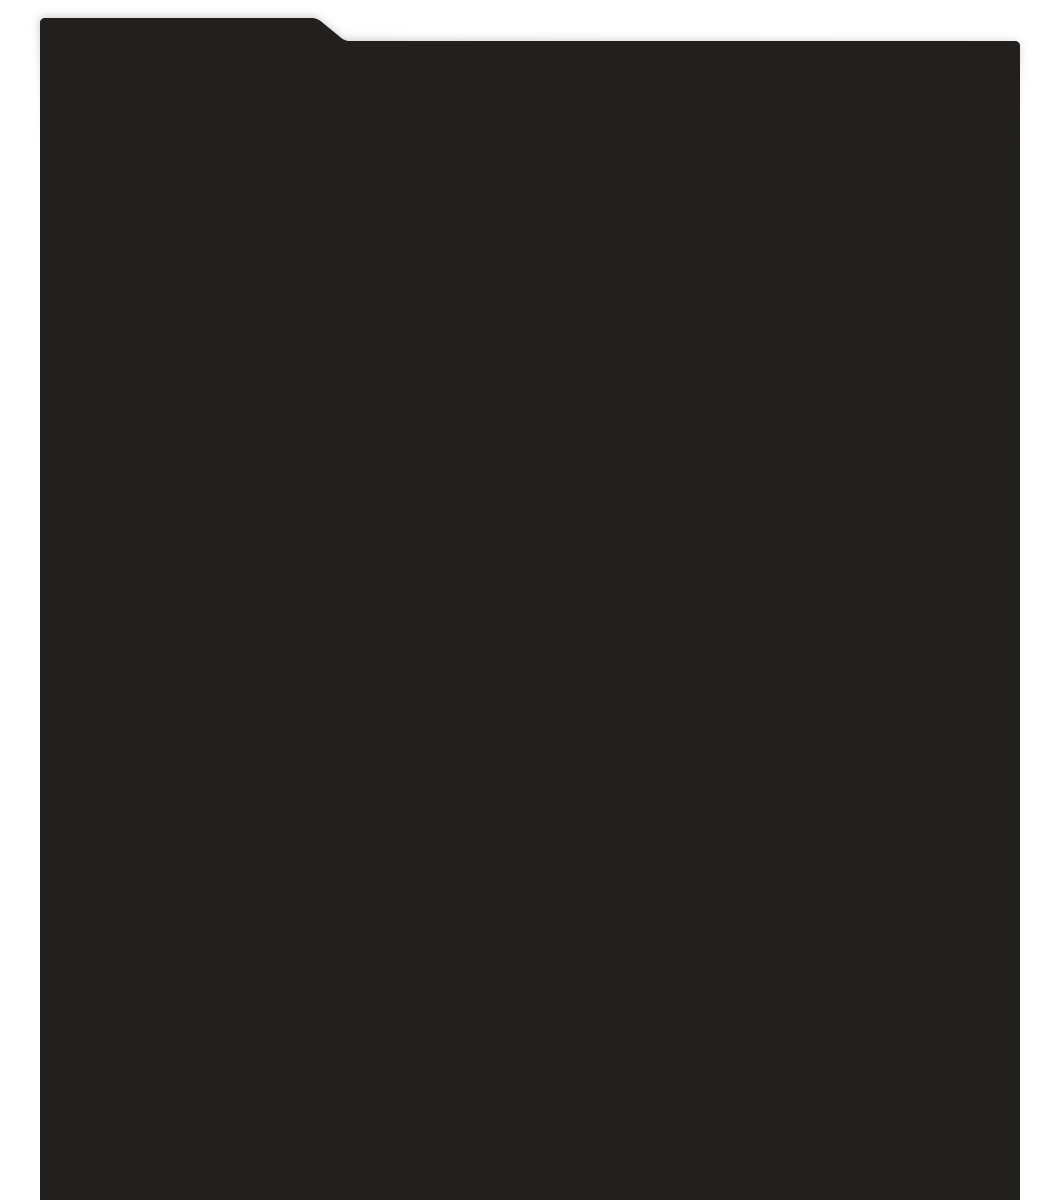
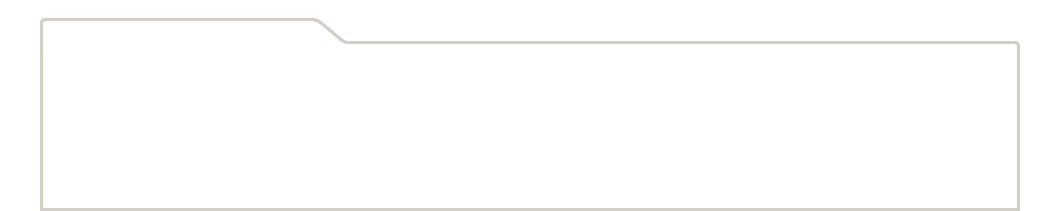
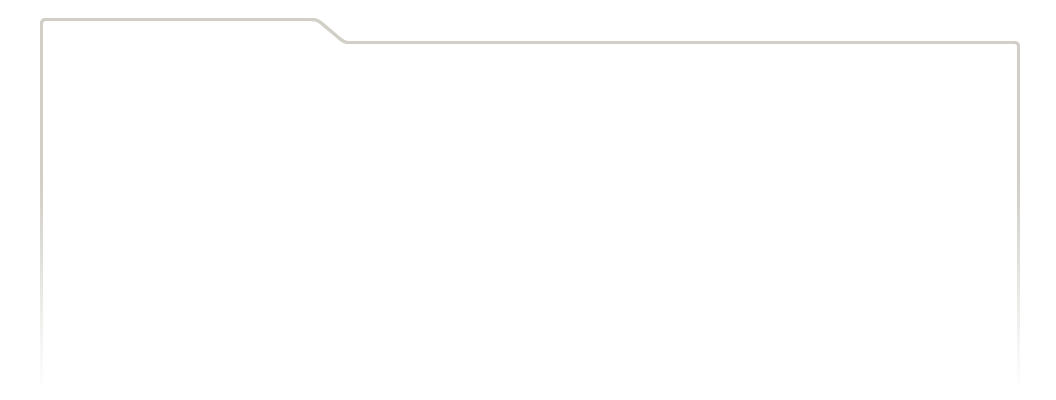
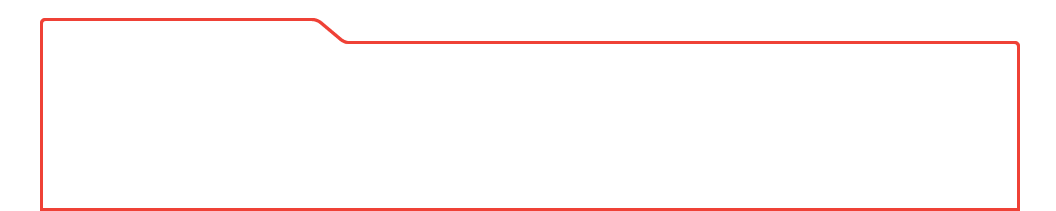
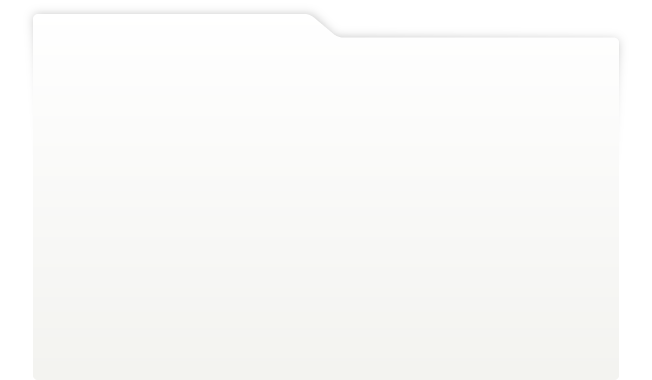
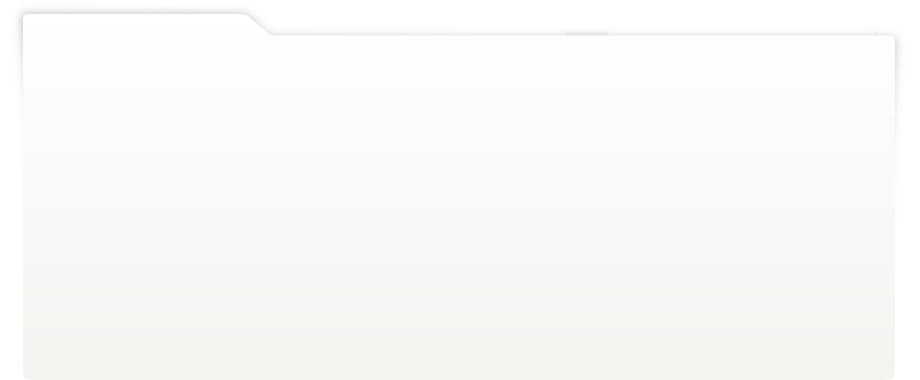
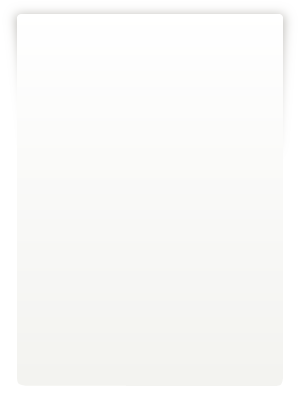
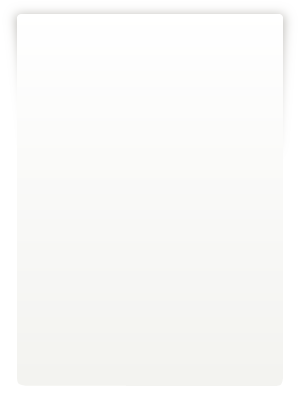
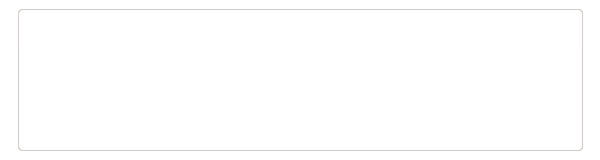
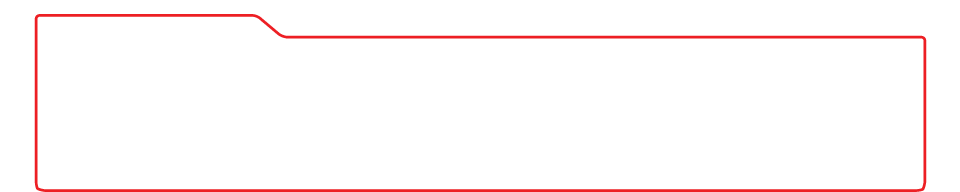
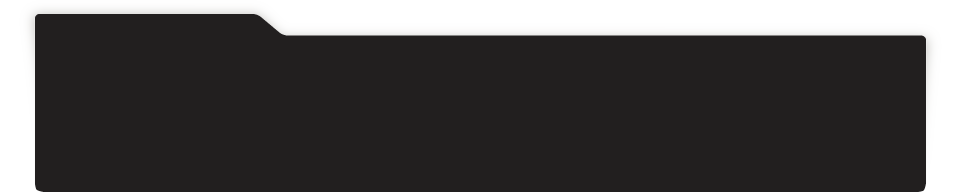
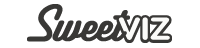
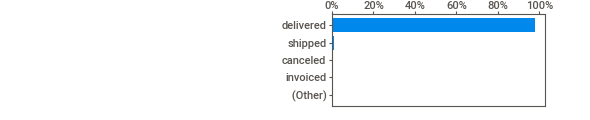
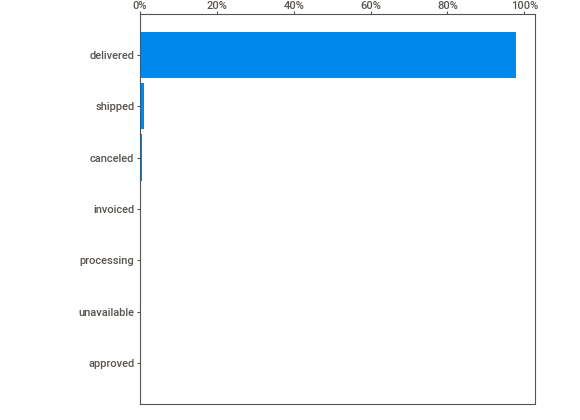
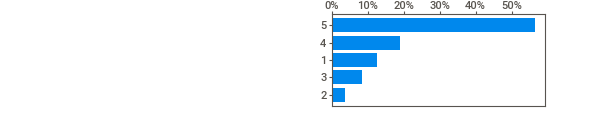
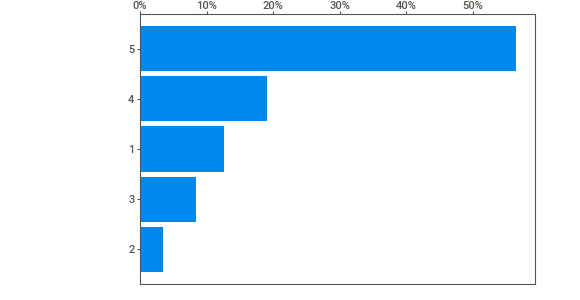
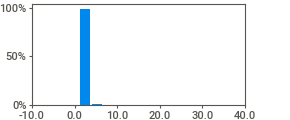
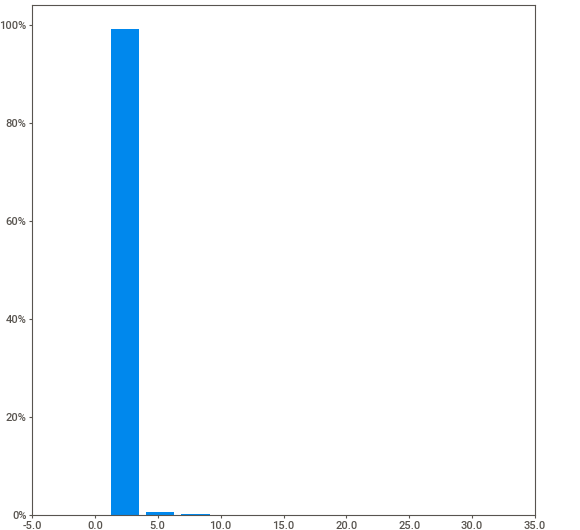
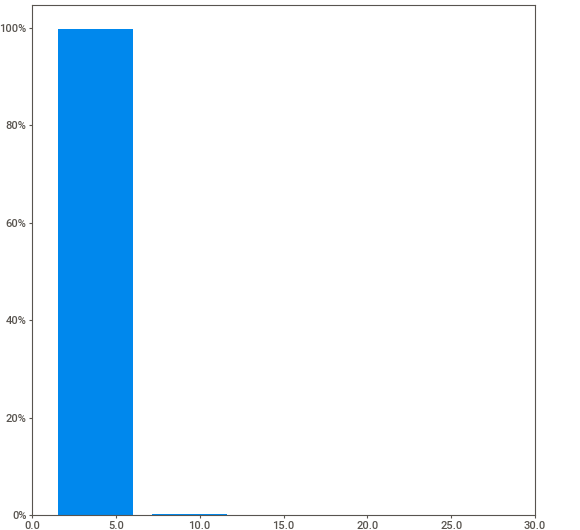
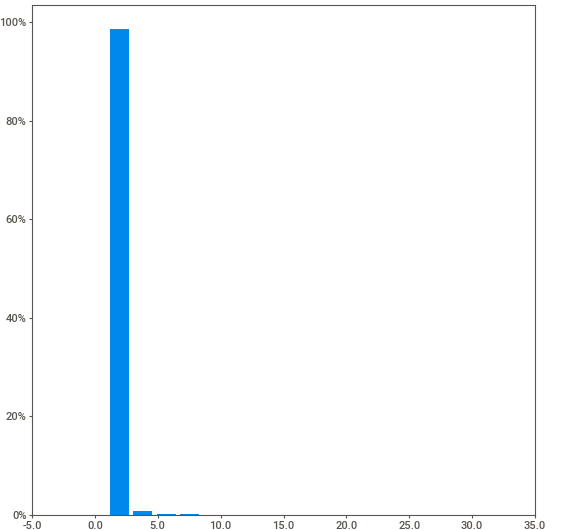
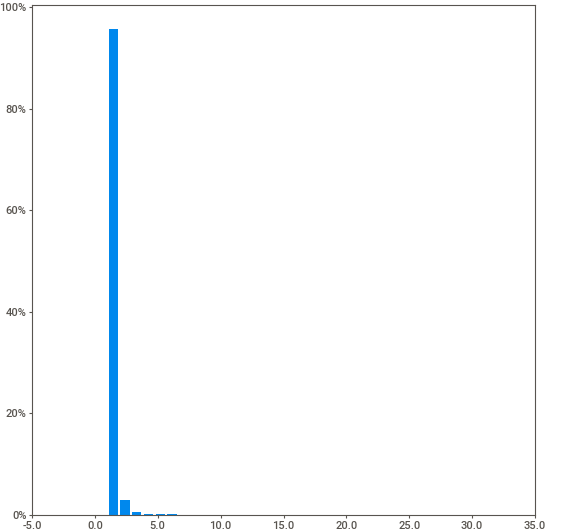
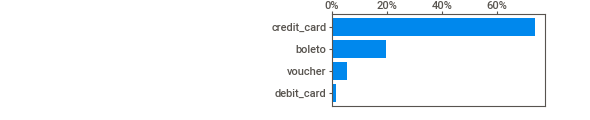
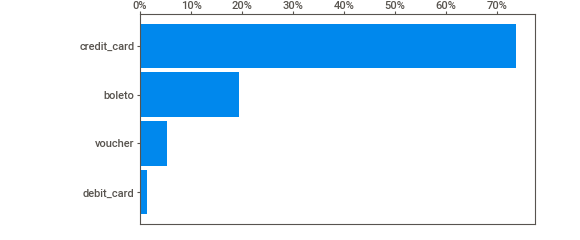
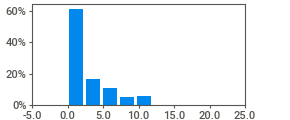
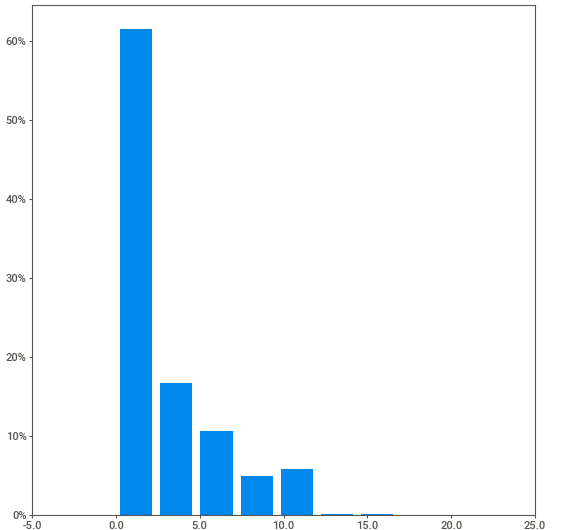
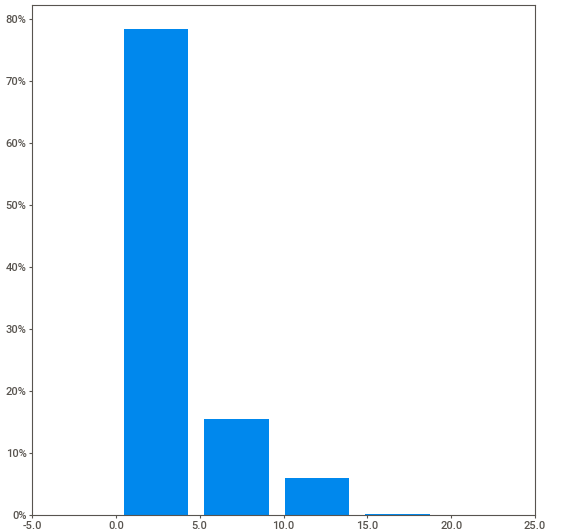
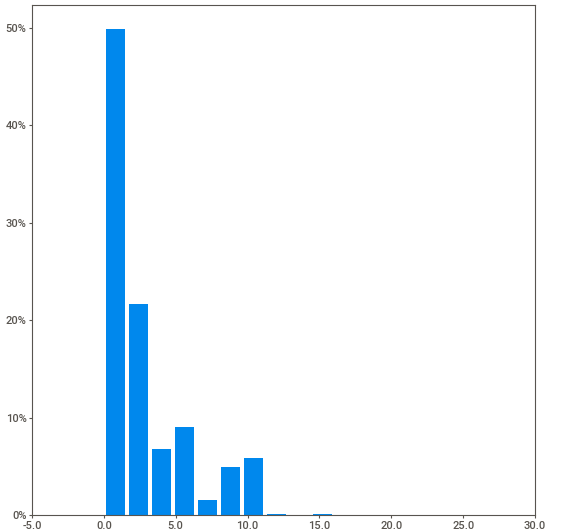
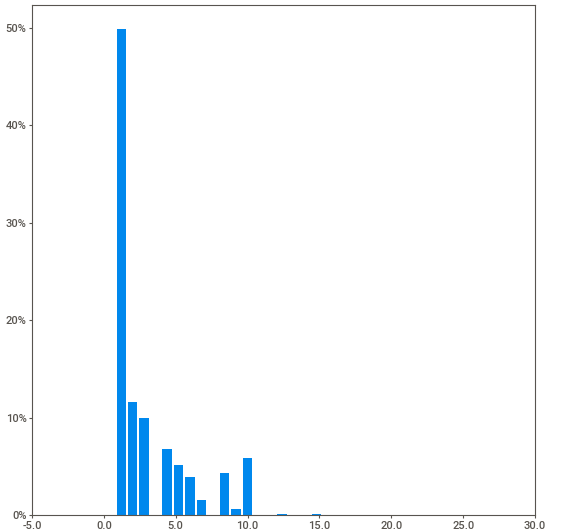
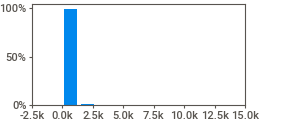
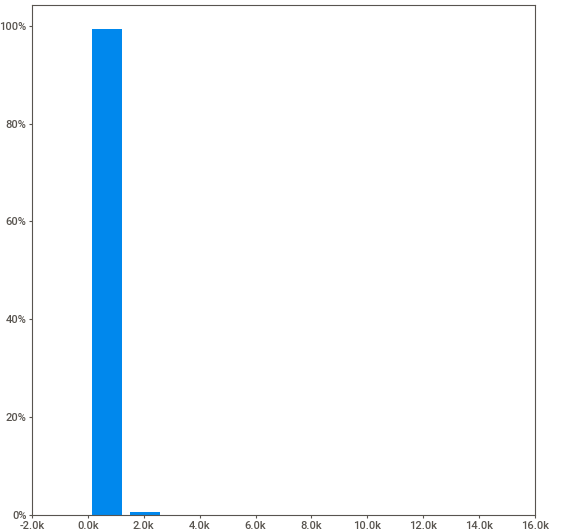
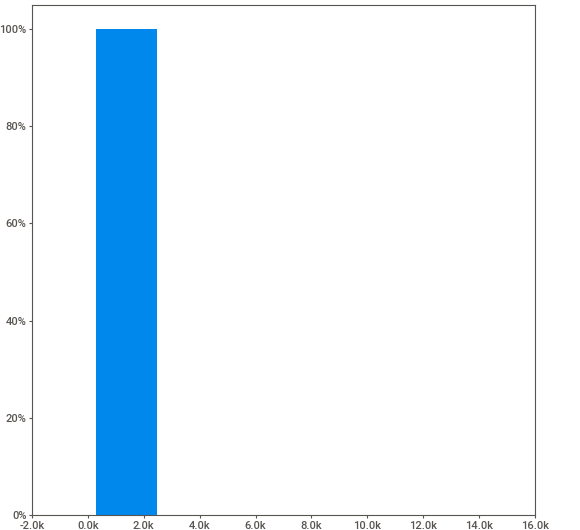
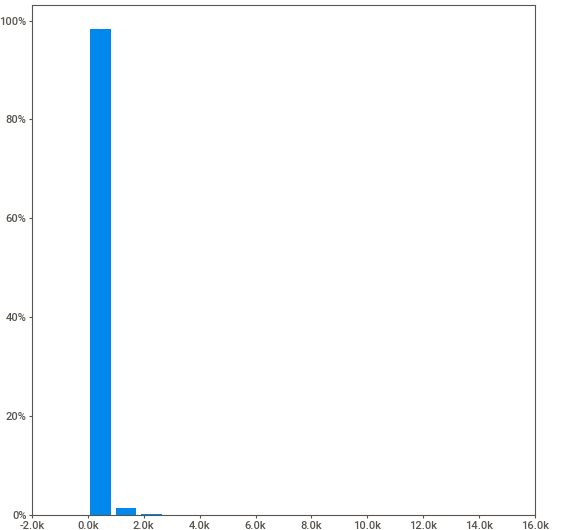
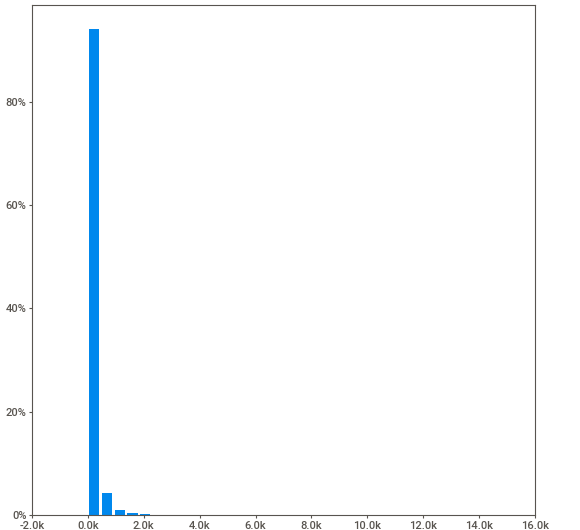
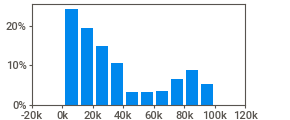
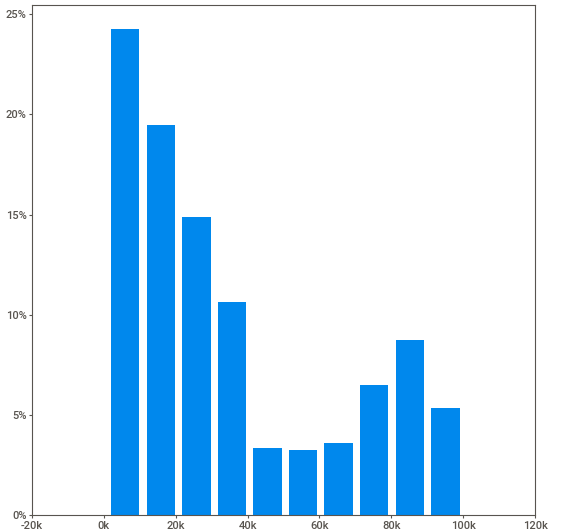
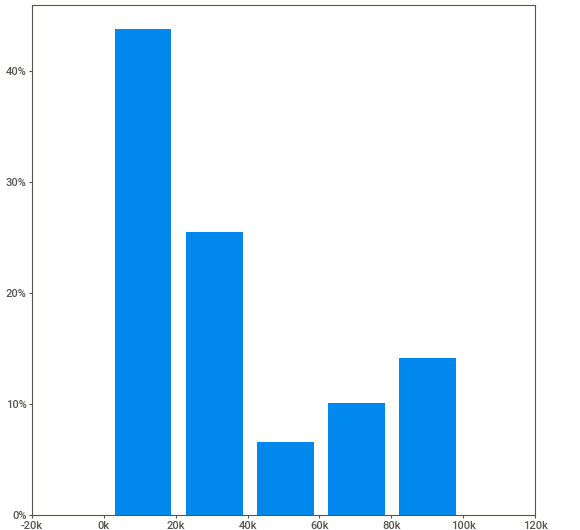
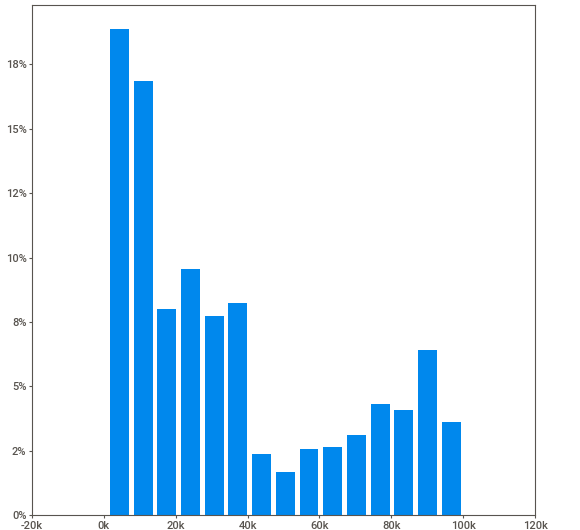
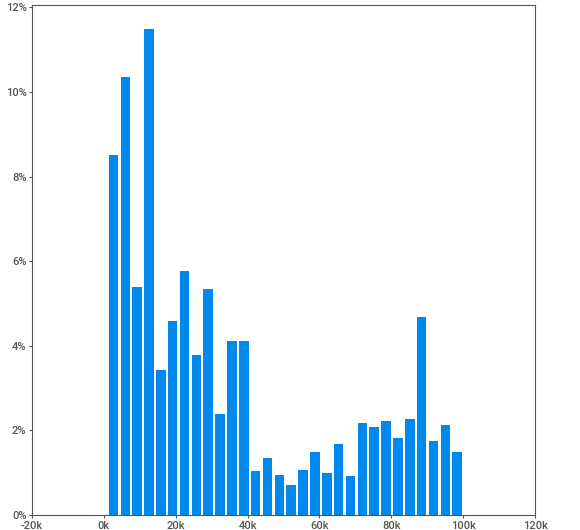
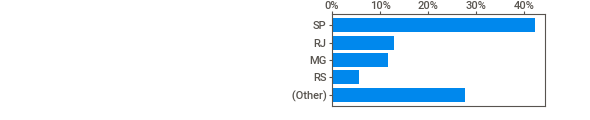
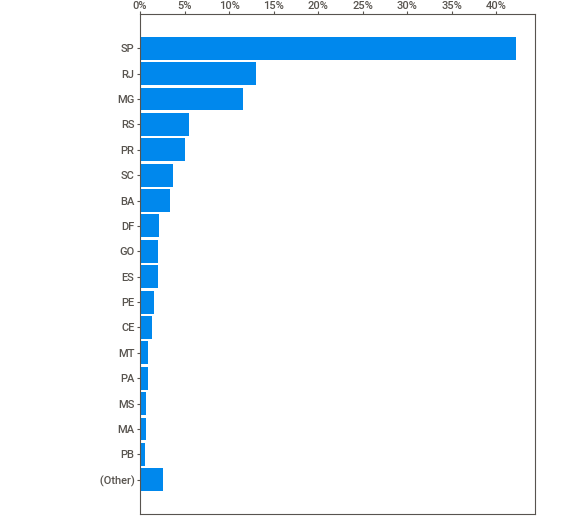
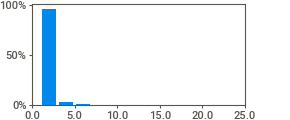
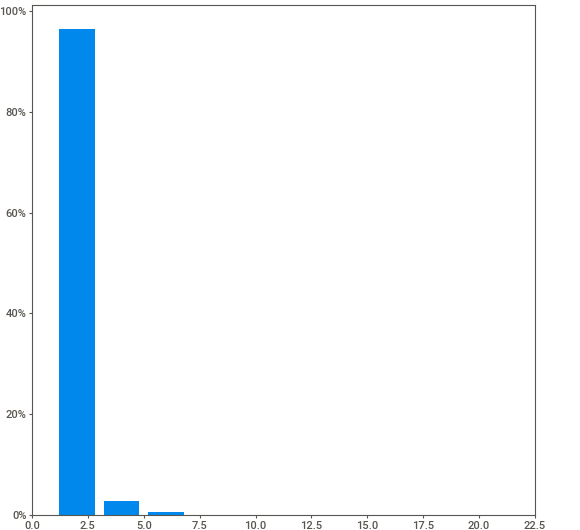
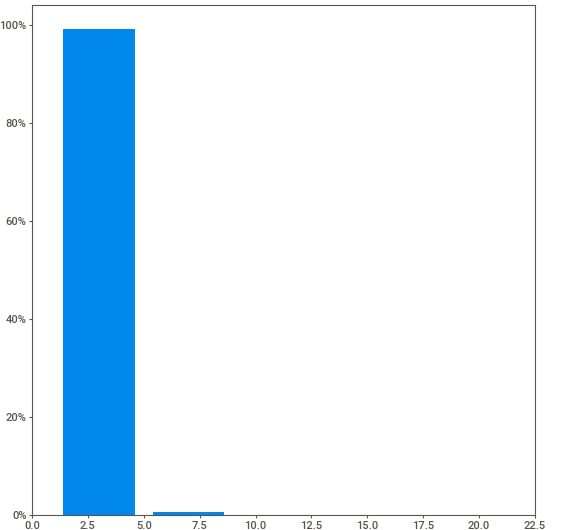
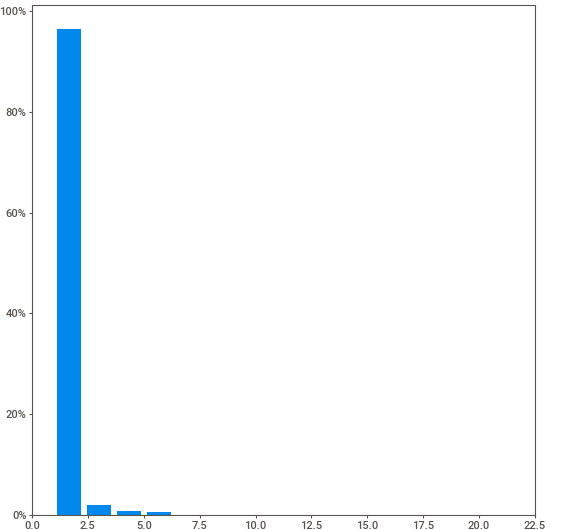
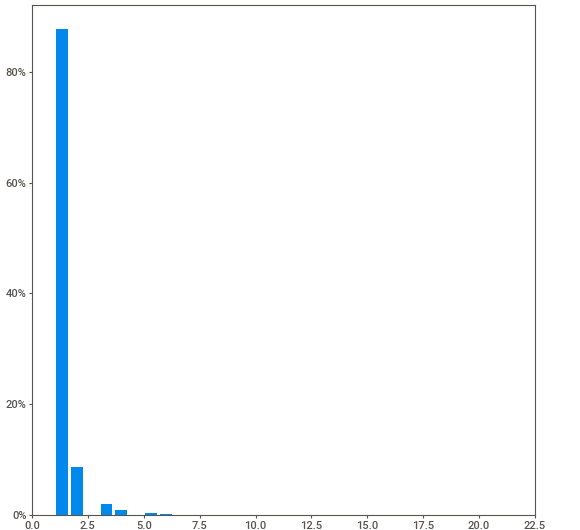
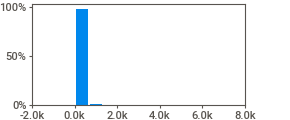
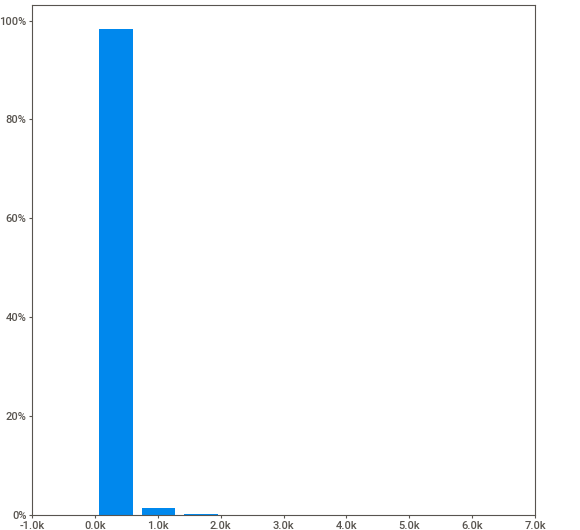
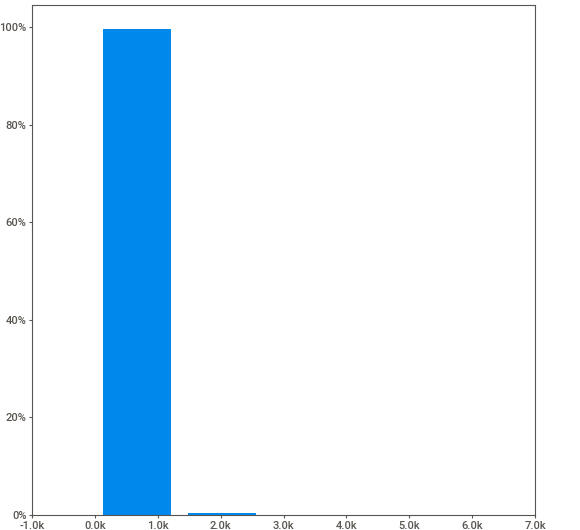
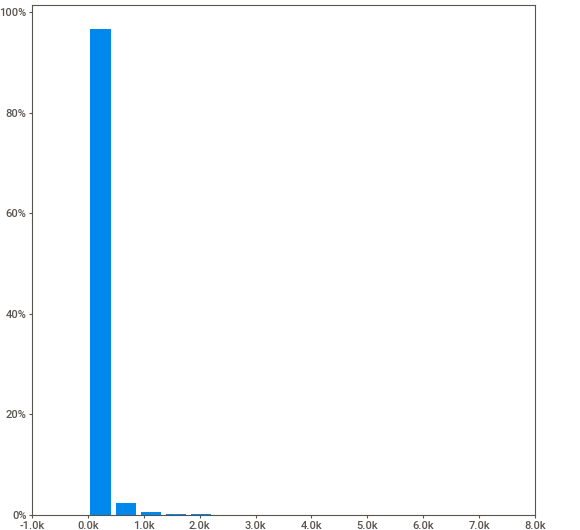
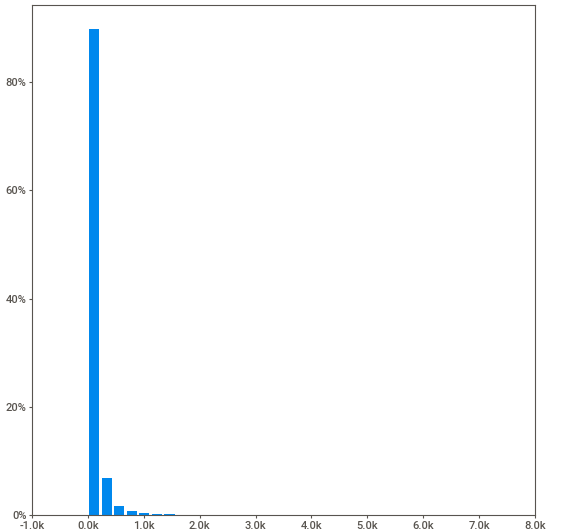
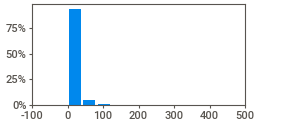
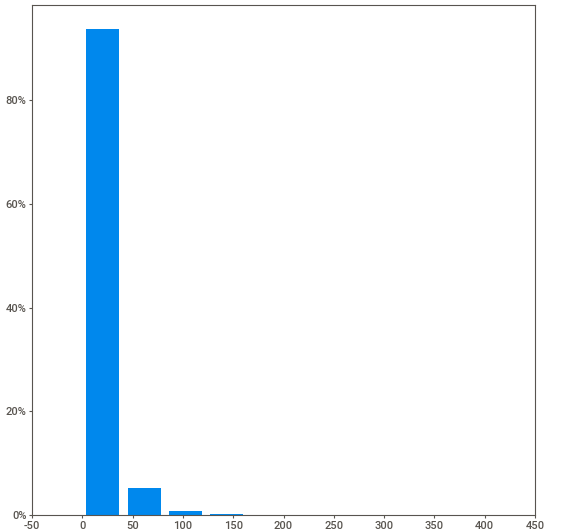
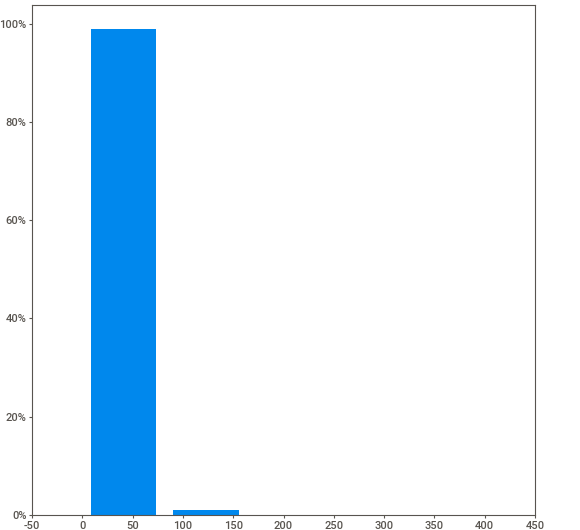
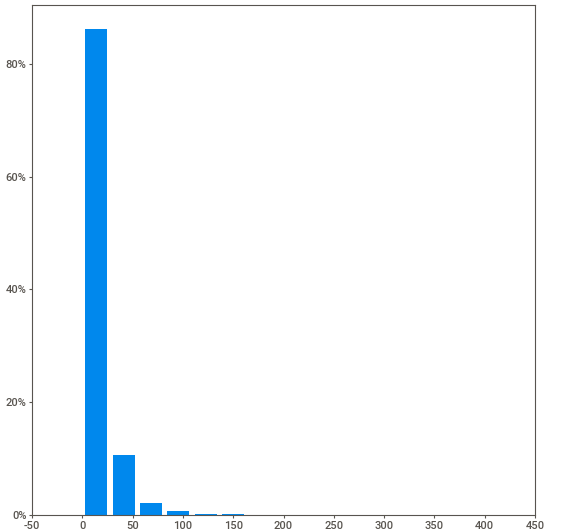
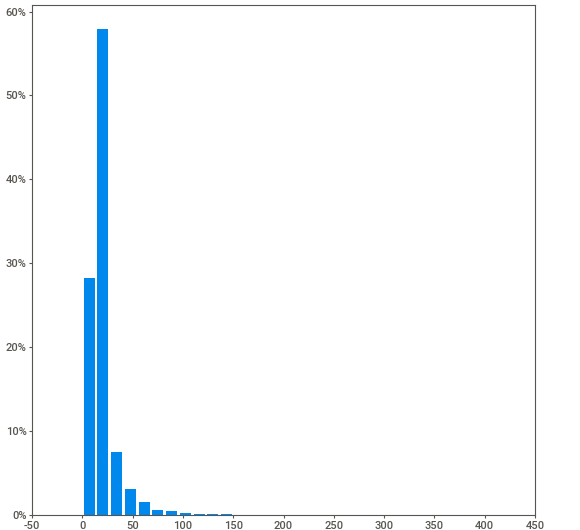
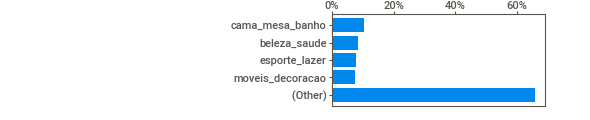
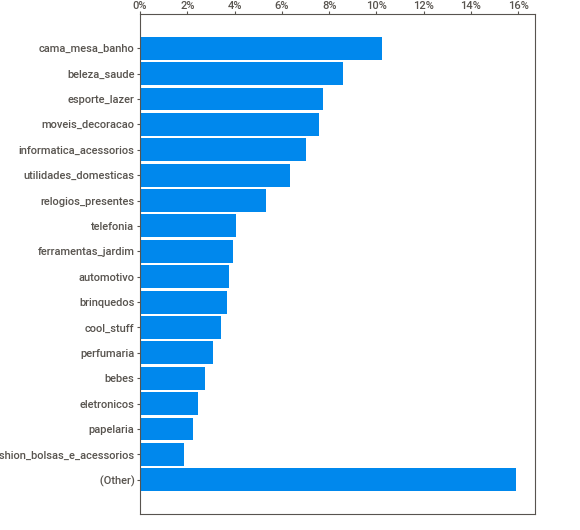
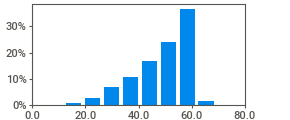
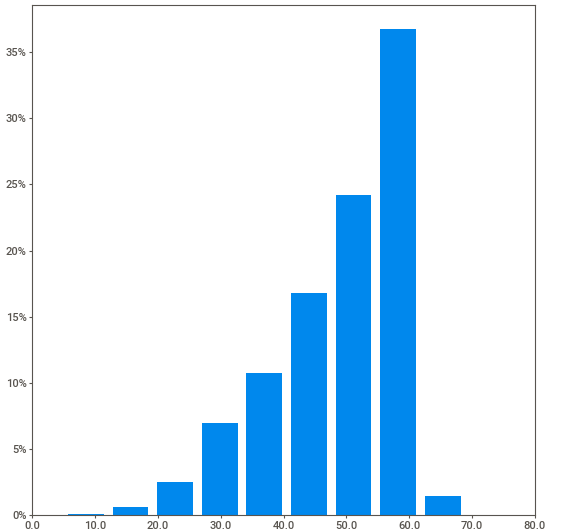
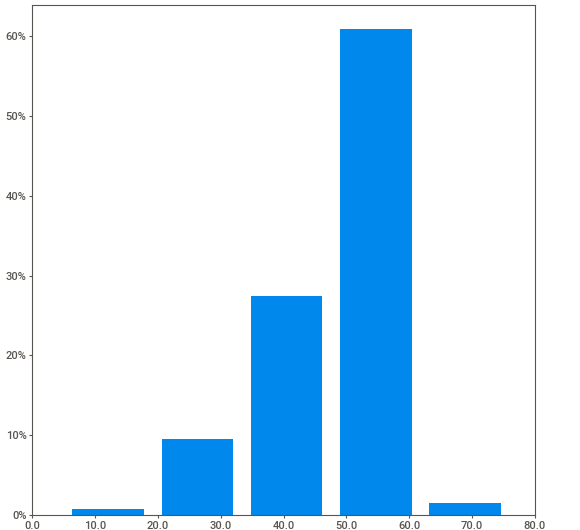
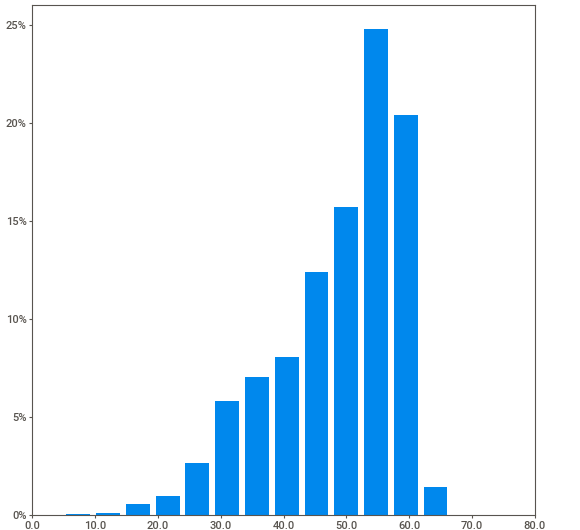
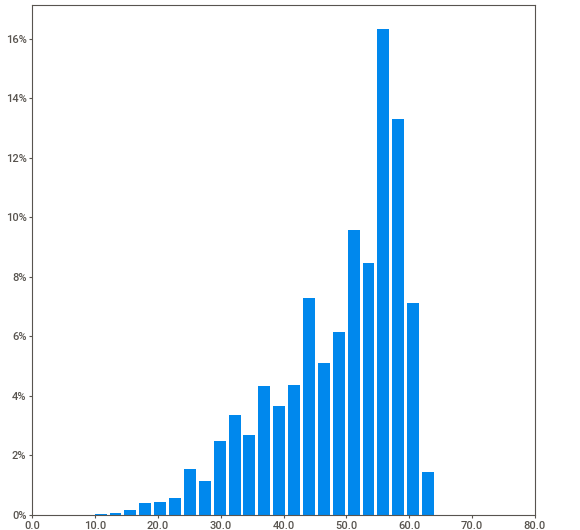
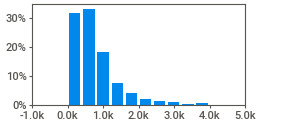
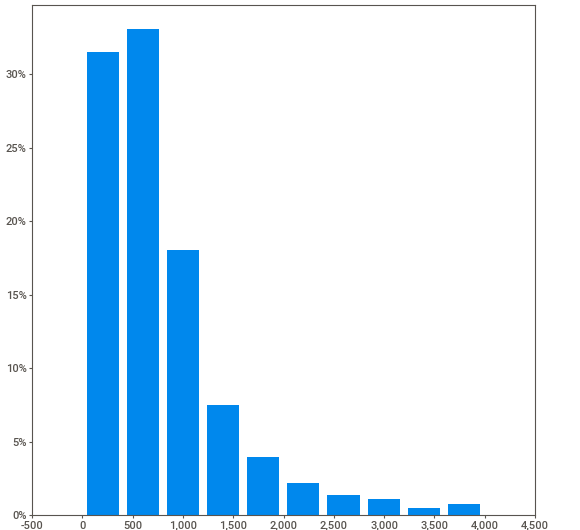
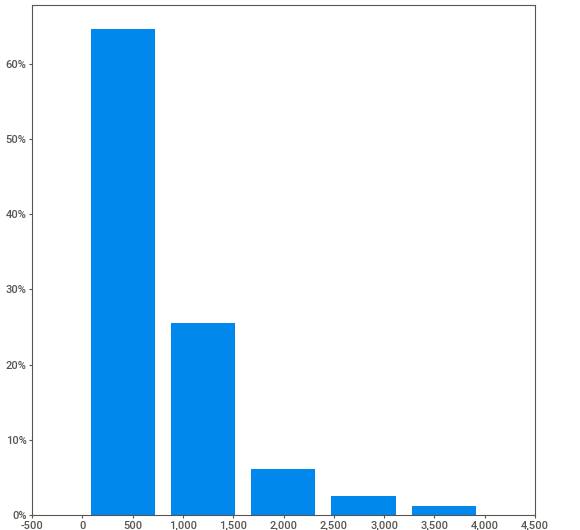
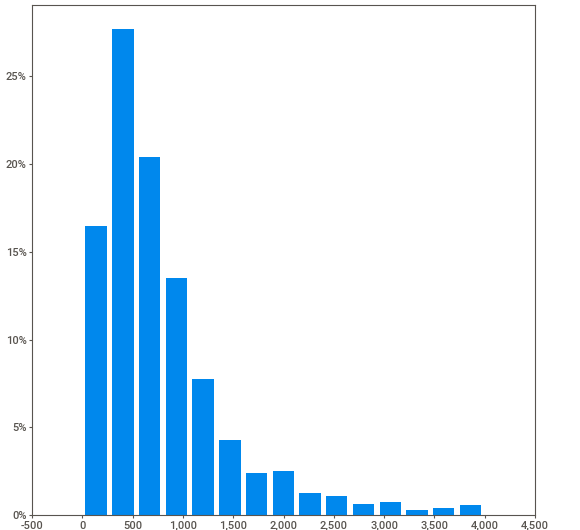
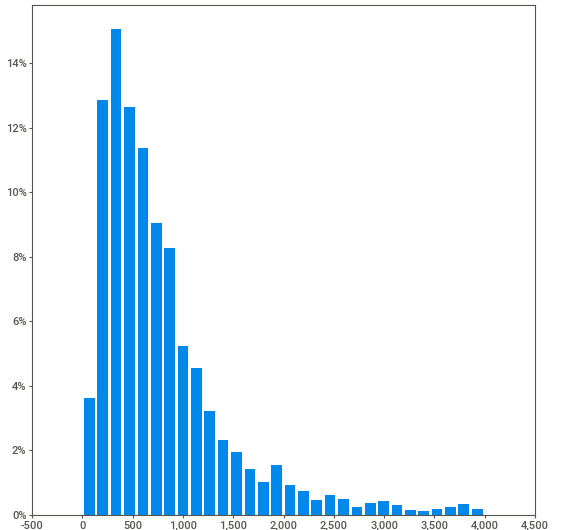
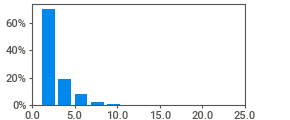
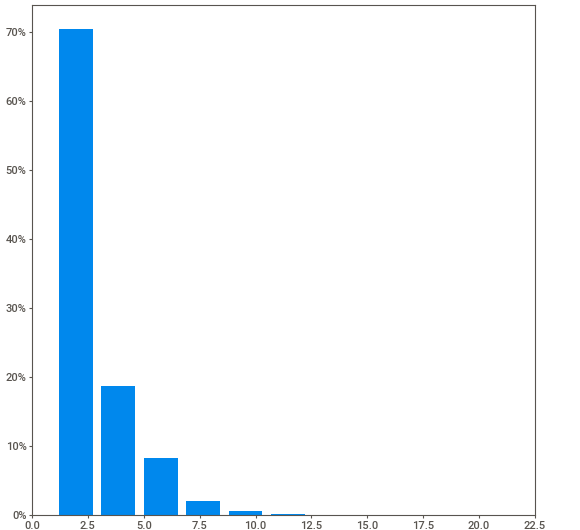
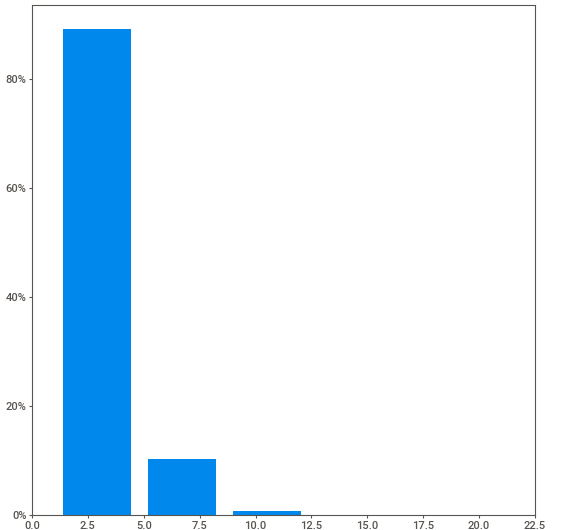
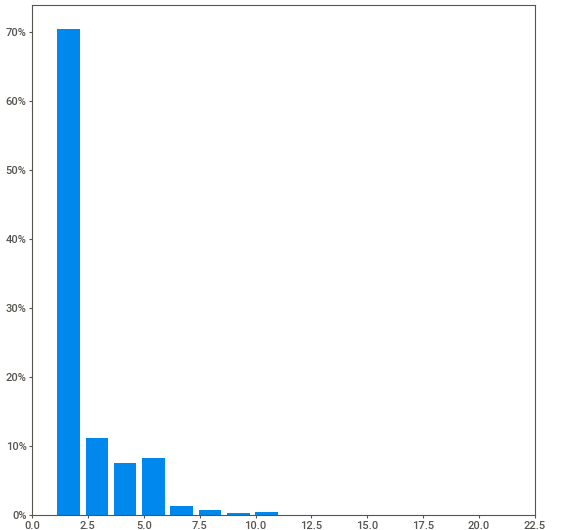
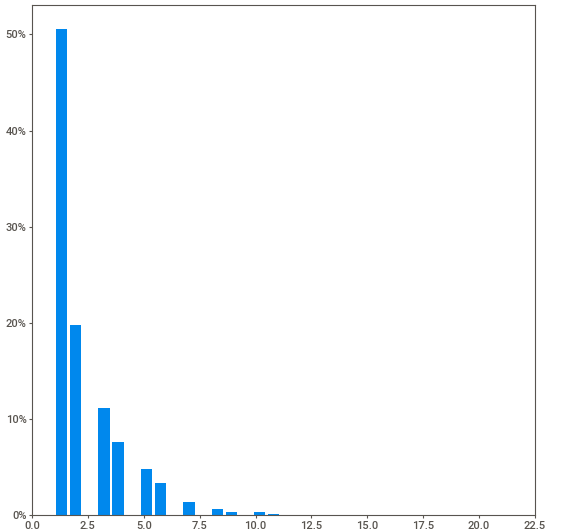
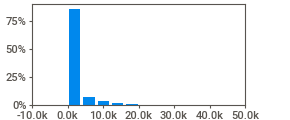
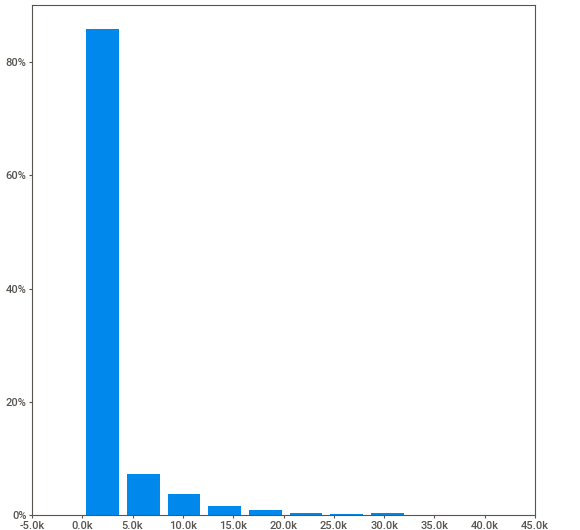
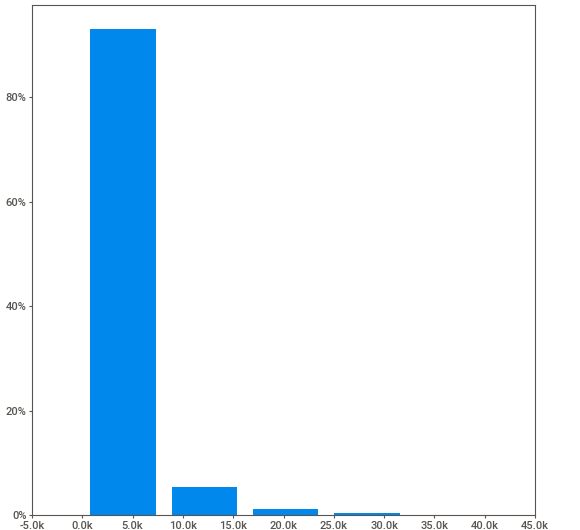
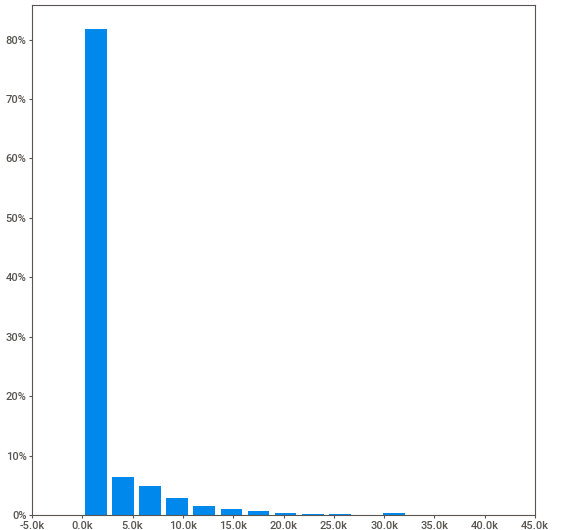
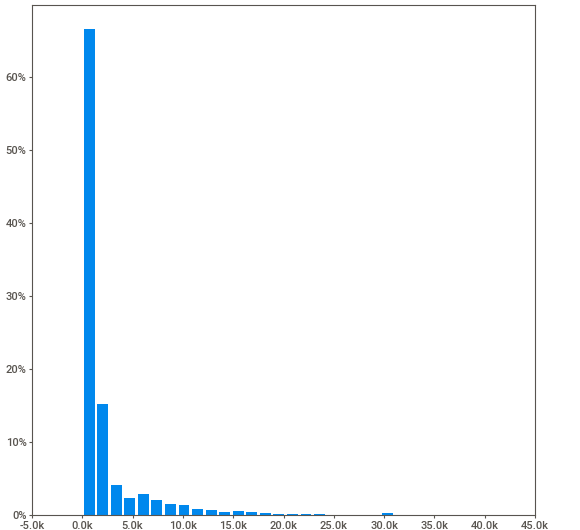
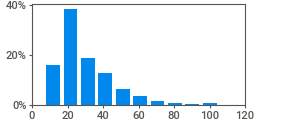
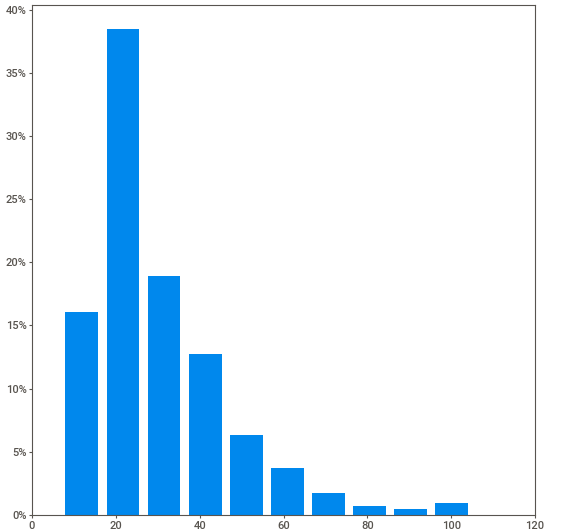
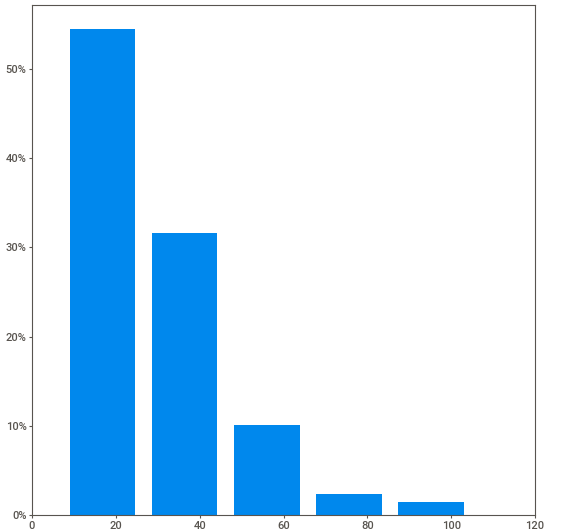
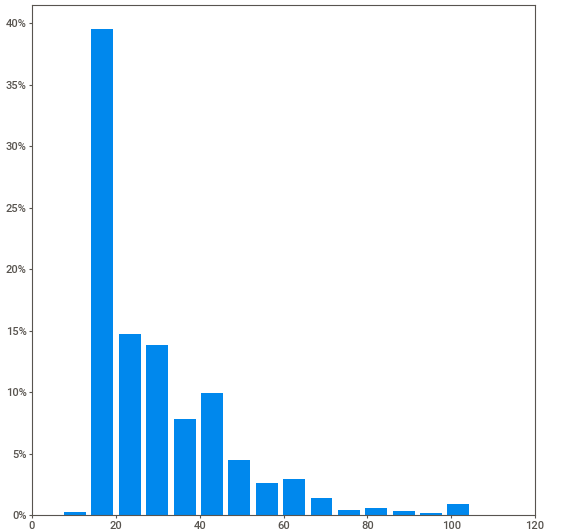
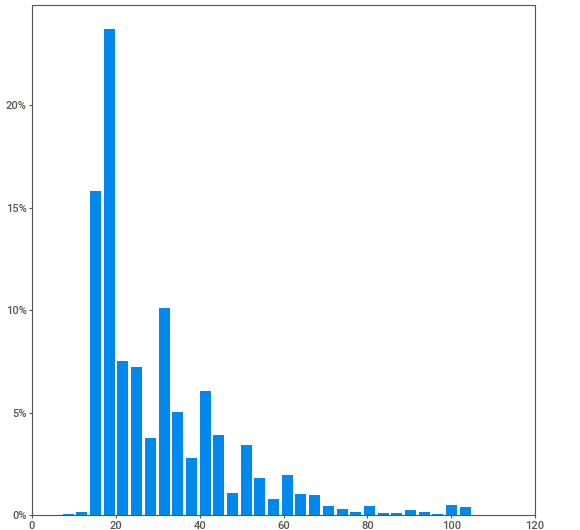
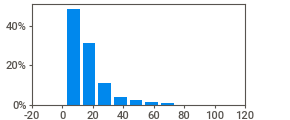
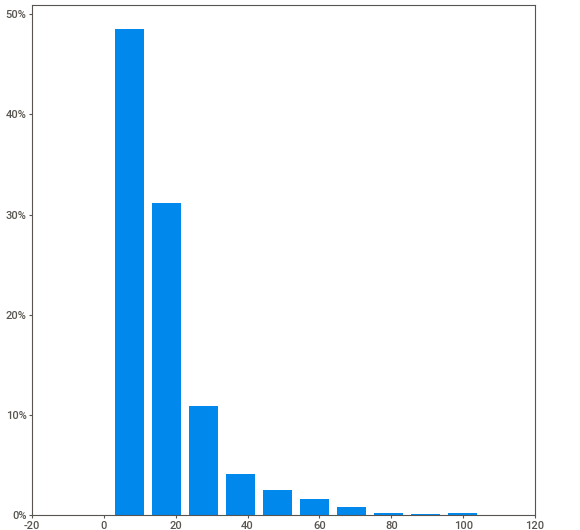
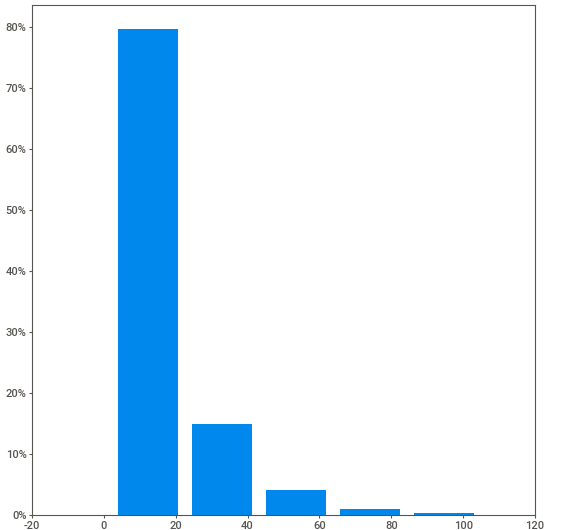
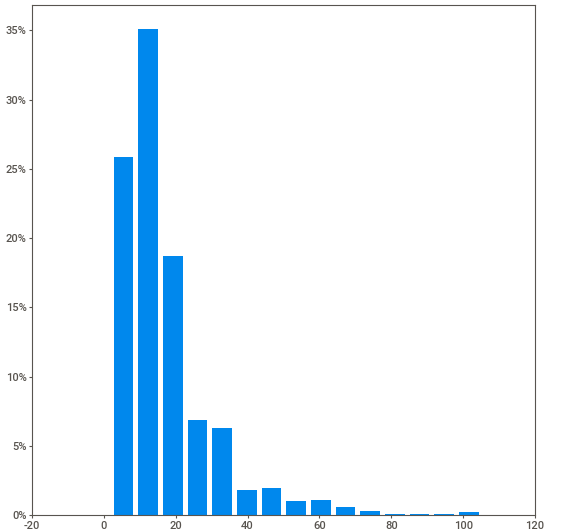
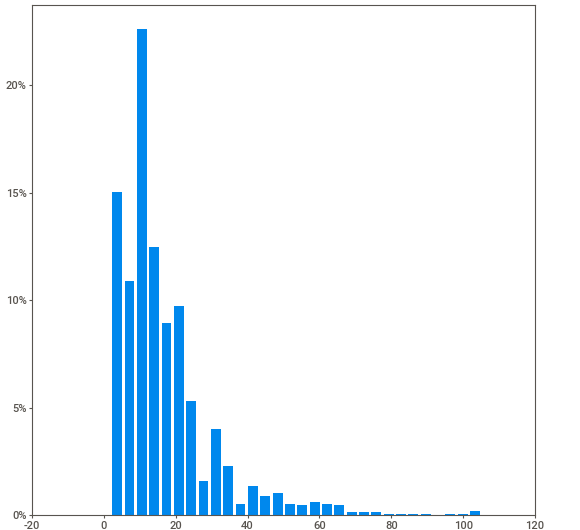
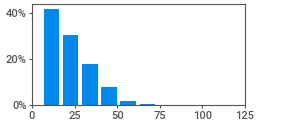
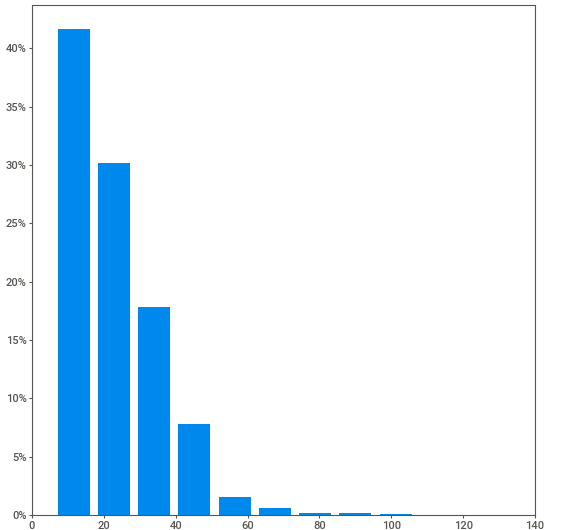
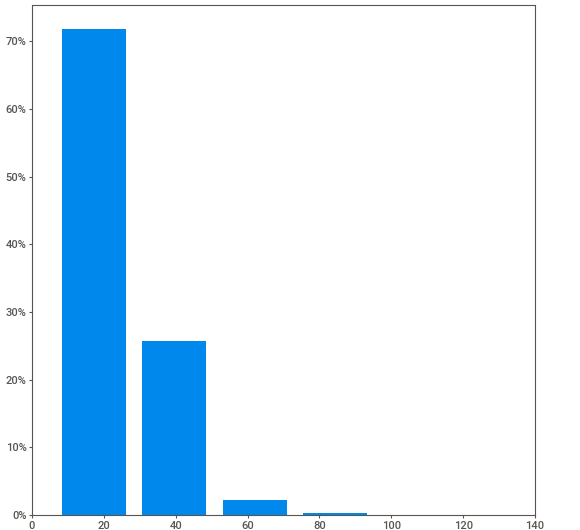
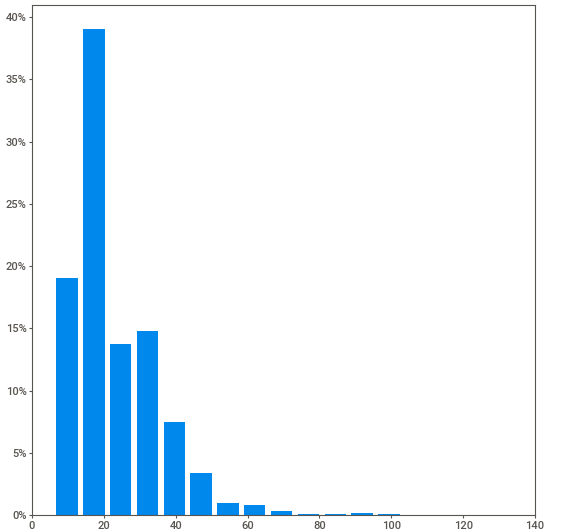
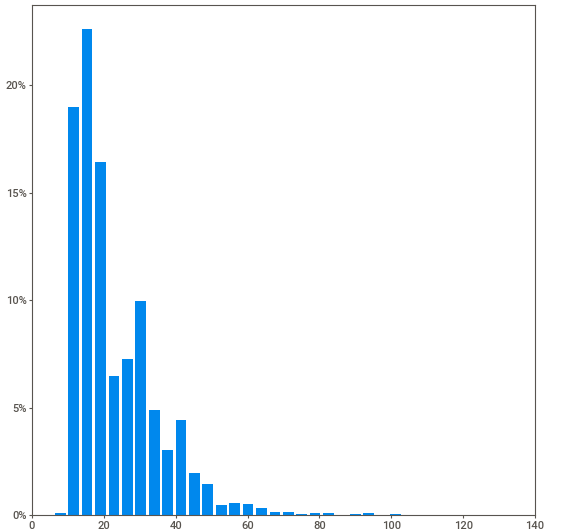
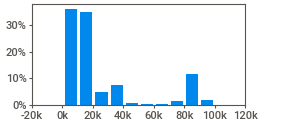
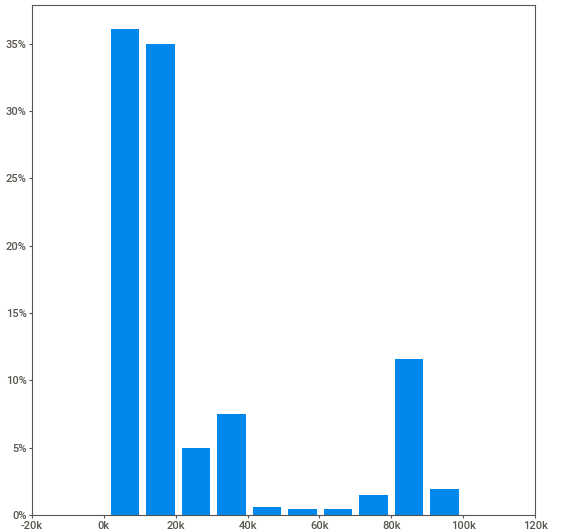
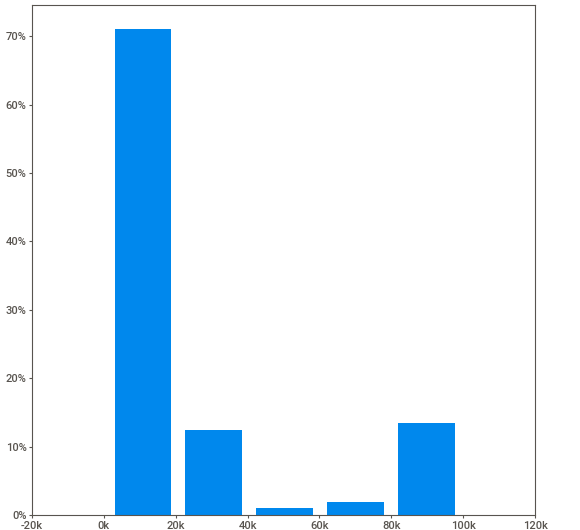
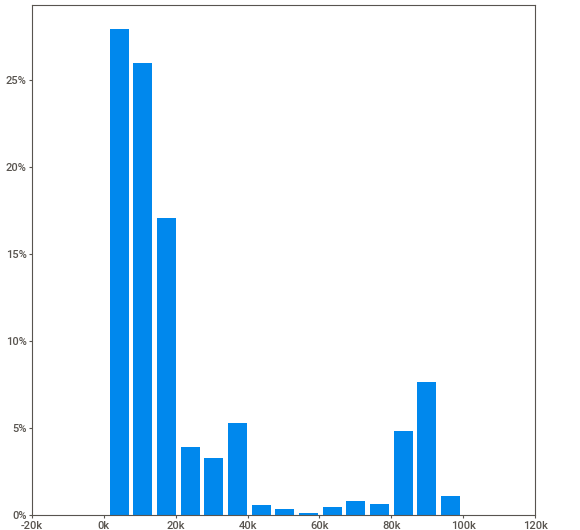
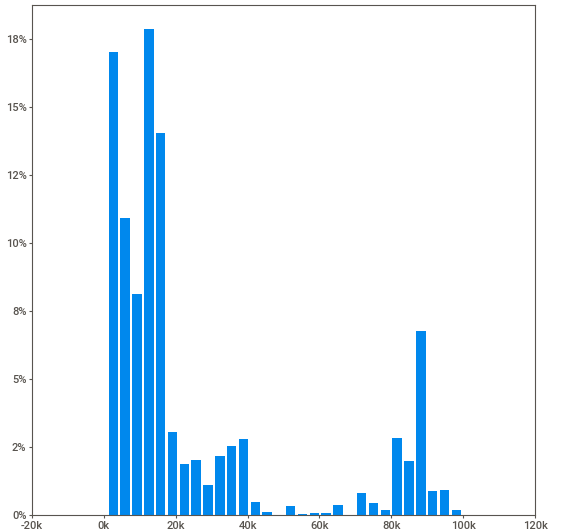
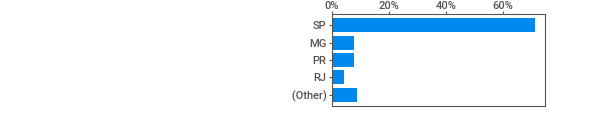
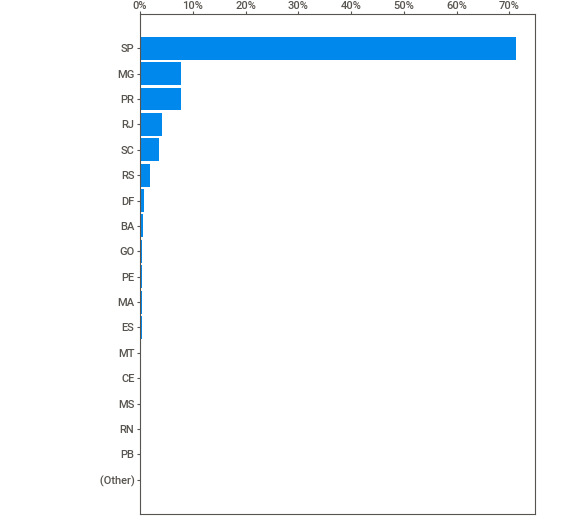
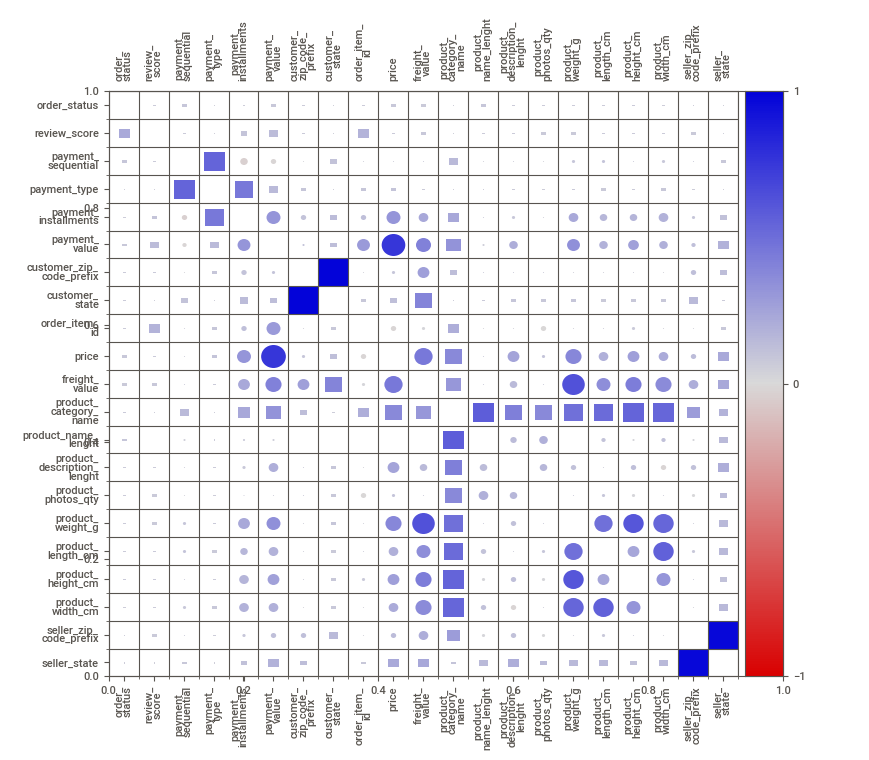
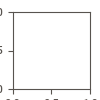

In [28]:
report = sv.analyze(full_df)
report.show_notebook()

### 5.2. Correlation

In [32]:
numeric_columns = ['review_score', 'payment_sequential', 'payment_installments',
                   'payment_value', 'price', 'freight_value', 'product_name_length',
                   'product_description_length', 'product_photos_qty', 'product_weight_g',
                   'product_length_cm', 'product_height_cm', 'product_width_cm']
numeric_df = full_df[numeric_columns]

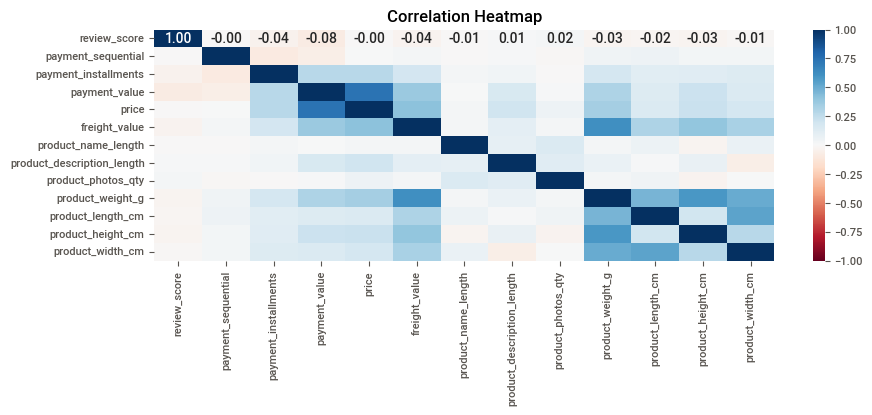

In [34]:
corr = numeric_df.corr()
plt.figure(figsize=(10, 3))
sns.heatmap(corr, cmap='RdBu', norm=plt.Normalize(-1,1), annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [46]:
pd.set_option('display.max_rows', None)
corr = numeric_df.corr()
correlation_df = pd.DataFrame(corr.stack(), columns=['correlation'])
correlation_df.reset_index(inplace=True)
correlation_df.columns = ['variable_1', 'variable_2', 'correlation']
correlation_df = correlation_df.sort_values(by='correlation', ascending=False)
correlation_df

,variable_1,variable_2,correlation
0,review_score,review_score,1.000000
14,payment_sequential,payment_sequential,1.000000
154,product_height_cm,product_height_cm,1.000000
140,product_length_cm,product_length_cm,1.000000
126,product_weight_g,product_weight_g,1.000000
112,product_photos_qty,product_photos_qty,1.000000
98,product_description_length,product_description_length,1.000000
70,freight_value,freight_value,1.000000
56,price,price,1.000000
42,payment_value,payment_value,1.000000
